# inception3_net



In [ ]:
import tensorflow as tf

In [ ]:
inception3_net = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet' , input_shape=None, pooling=None,
                                                   classes=1000) # 1000가지로 분류할 수 있음 

96112376/96112376 [==============================] - 5s 0us/step


In [ ]:
inception3_net.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

# ResNet

ResNet - 잔차 네트워크
- ResNet은 마이크로소프트에서 개발한 알고리즘이며 깊은 신경망을 제공합니다.
- 네트워크의 깊이가 깊어질수록 경사가 소실되거나 폭발하는 문제를 해결하고자 함
- 기존의 망과 차이가 있다면, l+2번째 비선형 함수 입력값에 l 번째 비선형 함수 출력값을 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준다
- 병목 합성곱 계층을 추가하거나 크기가 작은 커널을 사용
- 152개의 훈련 가능한 계층을 수직으로 연결하여 구성
- 모든 합성곱과 풀링 계층에서 패딩옵션으로 'SAME', stride=1 사용
- 3x3 합성곱 계층 다음마다 배치 정규화 적용, 1x1 합성곱 계층에는 활성화 함수가 존재하지 않음

<img src="https://miro.medium.com/max/1200/1*6hF97Upuqg_LdsqWY6n_wg.png">

  <sub>[이미지 출처] https://towardsdatascience.com/review-resnet-winner-of-ilsvrc-2015-image-classification-localization-detection-e39402bfa5d8</sub>


In [ ]:
resnet50 = tf.keras.applications.ResNet50(
    include_top=True, weights='imagenet', input_tensor=None,input_shape=None, pooling=None, classes=1000) 

102967424/102967424 [==============================] - 5s 0us/step


In [ ]:
resnet50.summary()

# 고양이 kaggle api= application programming interface

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install kaggle --upgrade

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jeongjaehun1025","key":"ab11a88b2c9ca333f1082791031fd6be"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/ # 카피한다.

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:03<00:00, 233MB/s]
100% 812M/812M [00:03<00:00, 221MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sampleSubmission.csv  train
drive		  sample_data  test1.zip	     train.zip


#### pathlib 모듈
파일, 디렉토리(폴더)의 경로를 객체로써 조작하거나 처리, 파일명 혹은 부모 디렉토리를 알아내거나 경로의 목록을 얻어내거나 파일을 작성하거난 삭제하는 등 대략적인 파일관련된 처리가 가능

In [ ]:
# 파일을 새로 만든다. 
import os, shutil, pathlib

original_dir = pathlib.Path("train") #train이라는 것 새로 만든다. 
new_base_dir = pathlib.Path("cats_vs_dogs_small") # 새로 만듬 

def make_subset(subset_name, start_index, end_index): # 새로만들 이름, 시작인데긋, 끝인덱스
    for category in ("cat", "dog"): # 캣도그 카테고리 지정 
        dir = new_base_dir / subset_name / category# 캣도그, train, 캣이냐dog냐 
        os.makedirs(dir) # 위에 파일 만듬 
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]# 카테고르 인덱스순서대로
        for fname in fnames:# 이미지파일들 
            shutil.copyfile(src=original_dir / fname, # source의 파일을 dst에 복사한다. # 파일 복사할 때 쓴다. 
                            dst=dir / fname)

In [ ]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500) 

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Rescaling, Conv2D, MaxPooling2D, Dense, Flatten

inputs =Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters =32, kernel_size=3, activation="relu")(x)
x=  layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters =64, kernel_size=3, activation="relu")(x)
x=  layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters =128, kernel_size=3, activation="relu")(x)
x=  layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters =256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) # 완전연결층에 연결하기 위해서 한다. 

outputs = layers.Dense(1, activation="sigmoid")(x)

model=keras.Model(inputs= inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics =["accuracy"])
# 훈련을 시킨다. 기준이 손실함수 손실함수가 최적화 되도록 옵티마이저 , 최적화 방법은 metrics 

In [ ]:
keras.__version__

'2.9.0'

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
# 텐서로 디코딩.. 데이터 셋을 배치사이즈 단위로 가져올 수 잇게해주는 메서드  
# 배치사이즈 32로 한다.

train_dataset = image_dataset_from_directory(
    new_base_dir/"train", image_size=(180,180), batch_size=32) # 개고양이 합쳐서 2000개

validation_dataset = image_dataset_from_directory(
    new_base_dir/"validation", image_size=(180,180), batch_size=32)

test_dataset = image_dataset_from_directory( 
    new_base_dir/"test", image_size=(180,180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print('데이터 배치 크기:', data_batch.shape) #한개의 로우씩 읽음 
    print('레이블 배치 크기:', labels_batch.shape) #한개의 로우씩 읽음 
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [ ]:
callbacks =[
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scrath.keras", save_best_only=True, monitor="val_loss")]
        # callback 모델 저장, early stoping

In [ ]:
# 오래걸린다.
history = model.fit( btrain_dataset, epochs=30, validation_data=validation_dataset, callbacks = callbacks)

Epoch 1/30
63/63 [==============================] - 6s 74ms/step - loss: 0.8683 - accuracy: 0.4875 - val_loss: 0.6868 - val_accuracy: 0.5420
Epoch 2/30
63/63 [==============================] - 5s 72ms/step - loss: 0.7080 - accuracy: 0.5450 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6936 - accuracy: 0.5720 - val_loss: 0.6753 - val_accuracy: 0.5730
Epoch 4/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6425 - accuracy: 0.6325 - val_loss: 0.7068 - val_accuracy: 0.6210
Epoch 5/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6212 - accuracy: 0.6795 - val_loss: 0.6944 - val_accuracy: 0.6150
Epoch 6/30
63/63 [==============================] - 5s 73ms/step - loss: 0.5590 - accuracy: 0.7190 - val_loss: 0.7733 - val_accuracy: 0.5830
Epoch 7/30
63/63 [==============================] - 5s 71ms/step - loss: 0.5229 - accuracy: 0.7435 - val_loss: 0.7726 - val_accuracy: 0.6400
Epoch 8/30
63

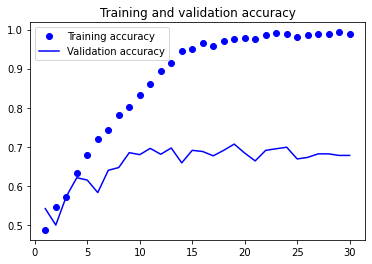

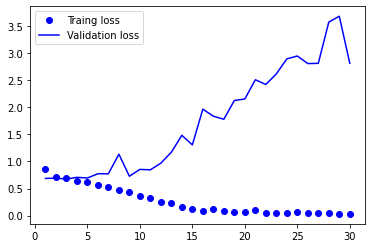

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy =history.history["val_accuracy"]
loss =history.history["loss"]
val_loss =history.history["val_loss"]
epochs= range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Traing loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()
plt.show()

In [ ]:
### 테스트 세트에서 모델 평가하기
test_model = keras.models.load_model("convnet_from_scrath.keras")
# 전문가가 만든 것을 가지고 와서 정확도를 더 높임 
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}') 

63/63 [==============================] - 3s 41ms/step - loss: 0.6568 - accuracy: 0.6270
테스트 정확도 : 0.627


# 데이터 증식

In [ ]:
#데이터 증식
from tensorflow.keras import layers
data_augmentation =keras.Sequential([
    
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    
])

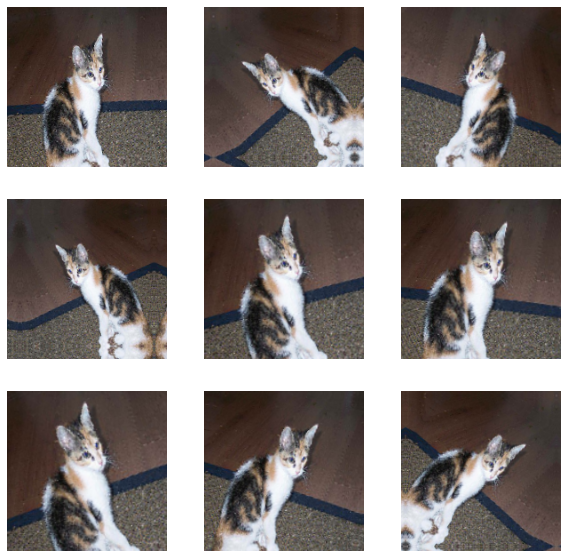

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images =data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
# 이미지 증식과 드롭아웃을 포함한 컨브넷 만들기 


inputs =Input(shape=(180, 180, 3))
x= data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters =32, kernel_size=3, activation="relu")(x)
x=  layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters =64, kernel_size=3, activation="relu")(x)
x=  layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters =128, kernel_size=3, activation="relu")(x)
x=  layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters =256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model=keras.Model(inputs= inputs, outputs=outputs)

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics =["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="convnet_from_scrath_with_augmentation.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks) 

Epoch 1/30
63/63 [==============================] - 13s 40ms/step - loss: 0.7897 - accuracy: 0.5440 - val_loss: 0.6864 - val_accuracy: 0.5750
Epoch 2/30
63/63 [==============================] - 2s 34ms/step - loss: 0.6998 - accuracy: 0.5380 - val_loss: 1.4879 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 2s 35ms/step - loss: 0.7259 - accuracy: 0.5520 - val_loss: 0.6666 - val_accuracy: 0.5930
Epoch 4/30
63/63 [==============================] - 2s 36ms/step - loss: 0.6718 - accuracy: 0.6125 - val_loss: 0.6890 - val_accuracy: 0.5530
Epoch 5/30
63/63 [==============================] - 2s 35ms/step - loss: 0.7330 - accuracy: 0.6095 - val_loss: 0.6272 - val_accuracy: 0.6350
Epoch 6/30
63/63 [==============================] - 2s 35ms/step - loss: 0.6405 - accuracy: 0.6495 - val_loss: 0.6273 - val_accuracy: 0.6260
Epoch 7/30
63/63 [==============================] - 2s 35ms/step - loss: 0.6393 - accuracy: 0.6555 - val_loss: 0.6123 - val_accuracy: 0.6690
Epoch 8/30
6

In [ ]:
### 테스트 세트에서 모델 평가하기
test_model = keras.models.load_model("convnet_from_scrath_with_augmentation.keras")
# 전문가가 만든 것을 가지고 와서 정확도를 더 높임 
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}') 

63/63 [==============================] - 1s 10ms/step - loss: 0.4782 - accuracy: 0.7830
테스트 정확도 : 0.783


# 사전 훈련된 모델 사용

In [ ]:
from tensorflow import keras # vgg16인것은 레이어가 16개
conv_base = keras.applications.vgg16.VGG16(
weights = "imagenet", include_top=False, input_shape=(180,180,3)) # 끝부분 Dense 층연결 안함 conv층만 사용

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
# pre train된거 사용하는 방법이 두가지 데이터 증식 x, 데이터 증식 o 

# 데이터 증식을 사용하지 않는 빠른 특성 추출

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images) # vgg16에서 사용할 수 있는 텐서로 바꿔쥬는 함수 
        # 원래는 180, 180, 3으로 바꿈...? 원래 이미지 파일이였음180, 180으로 된 batch size= 32
        # 3은 컬러를 의미함 즉 RGB임 그러나 BGR로 바꿈  BGR- imagedataset의 평균값
        features = conv_base.predict(preprocessed_images)#데이터 증식을 사용하지 않는 빠른 추출
        # predict를해서 결과물들을 모음 flatten까지 했을 때 즉 fully connected전에 conv할때까지만 
        # 여러개 나온거를 fully connected 한다. 
        # 컨브조작을 안하고 그 결뫄만 가지고 분류
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset) 

1/1 [==============================] - 0s 22ms/step


In [ ]:
train_features.shape

(2000, 5, 5, 512)

In [ ]:
inputs = keras.Input(shape=(5, 5, 512)) # 플레튼 직전의 모습
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks) 

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 16.6721 - accuracy: 0.9225 - val_loss: 4.5013 - val_accuracy: 0.9750
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 4.3597 - accuracy: 0.9715 - val_loss: 4.8559 - val_accuracy: 0.9730
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.0933 - accuracy: 0.9845 - val_loss: 3.2937 - val_accuracy: 0.9810
Epoch 4/20
63/63 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.9940 - val_loss: 3.5733 - val_accuracy: 0.9790
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.7345 - accuracy: 0.9940 - val_loss: 4.8783 - val_accuracy: 0.9770
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.7161 - accuracy: 0.9910 - val_loss: 5.4099 - val_accuracy: 0.9750
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8518 - accuracy: 0.9925 - val_loss: 4.8000 - val_accuracy: 0.9810
Epoch 8/20
63/63 [=

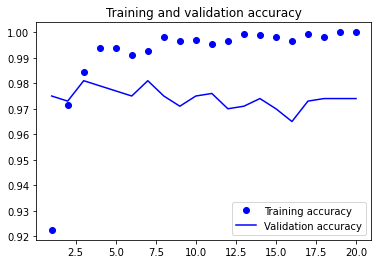

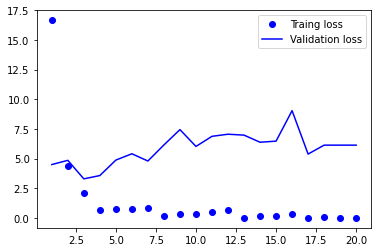

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy =history.history["val_accuracy"]
loss =history.history["loss"]
val_loss =history.history["val_loss"]
epochs= range(1,len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Traing loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.legend()
plt.show()

In [ ]:
### 테스트 세트에서 모델 평가하기
test_model = keras.models.load_model("feature_extraction.keras")
# 전문가가 만든 것을 가지고 와서 정확도를 더 높임 
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'테스트 정확도 : {test_acc:.3f}') 

ValueError: ignored

# 사전훈련된 모델 미세 조정하기

In [ ]:
# 마지막에서 네번째 층까지 모든 층 동결하기 
conv_base.trainable = True
for layer in conv_base.layers[:-4]: #블록 4
  layer.trainable=False

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),# 소수점 0이 5개 
              metrics=['accuracy'])

callback =[
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras"
        save_best_only=True,
        monitor="val_loss"
    )
]

history=model.fit(train_dataset, epochs=30, validation_data=validation_data, callbacks=callback)


# 과제 동결하기

In [ ]:
from tensorflow import keras # vgg16인것은 레이어가 16개
conv_base = keras.applications.vgg16.VGG16(
weights = "imagenet", include_top=False, input_shape=(180,180,3))

- VCG16의 합성곱 기반 층은 1400만개 정도의 파라미터를 가지고, 그 위의 분류기는 200만개 정도의 파라미터를 가집니다.
- 모델을 컴파일하고 훈련하기 전에 합성곱 기반 층을 동결하는 것이 매우 중요합니다. 동결(freezing) 은 훈련하는 동안 가중치가 업데이트되지 않도록 막는 것을 의미합니다.
- 여기서는 동결에 대한 설정이 없다면 맨 위의 Dense층이 랜덤하게 초기화되었기 때문에 매우 큰 가중치 값이 학습된 값에 영향을 미치게 됩니다. 케라스에서는 trainable 속성으로 동결을 할 수 있습니다.

In [ ]:
conv_base.trainable = False # 동결 conv층은 안사용하니까
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
) 

In [ ]:
inputs = keras.Input(shape=(180, 180, 3)) # 플레튼 직전의 모습
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")]

history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=(validation_dataset),
    callbacks=callbacks) 

Epoch 1/5
63/63 [==============================] - 5s 53ms/step - loss: 16.5560 - accuracy: 0.9055 - val_loss: 3.4243 - val_accuracy: 0.9720
Epoch 2/5
63/63 [==============================] - 3s 48ms/step - loss: 10.7327 - accuracy: 0.9265 - val_loss: 4.6743 - val_accuracy: 0.9680
Epoch 3/5
63/63 [==============================] - 3s 47ms/step - loss: 5.8803 - accuracy: 0.9515 - val_loss: 9.8178 - val_accuracy: 0.9510
Epoch 4/5
63/63 [==============================] - 3s 47ms/step - loss: 5.1603 - accuracy: 0.9595 - val_loss: 3.6389 - val_accuracy: 0.9730
Epoch 5/5
63/63 [==============================] - 3s 47ms/step - loss: 3.6512 - accuracy: 0.9680 - val_loss: 3.6634 - val_accuracy: 0.9730


# pretraindmodel_ex

# CNN 모델의 발전

* 1998: LeNet – Gradient-based Learning Applied to Document Recognition
* 2012: AlexNet – ImageNet Classification with Deep Convolutional Neural Network
* **2014: VggNet – Very Deep Convolutional Networks for Large-Scale Image Recognition**
* **2014: GooLeNet – Going Deeper with Convolutions**  # inception
* 2014: SppNet – Spatial Pyramid Pooling in Deep Convolutional Networks for Visual Recognition
* **2015: ResNet – Deep Residual Learning for Image Recognition**
* **2016: Xception – Xception: Deep Learning with Depthwise Separable Convolutions**
* **2017: MobileNet – MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Application**
* **2017: DenseNet – Densely Connected Convolutional Networks**
* 2017: SeNet – Squeeze and Excitation Networks
* 2017: ShuffleNet – ShuffleNet: An Extremely Efficient Convolutional Neural Network for Mobile Devices
* **2018: NasNet – Learning Transferable Architectures for Scalable Image Recognition**
* 2018: Bag of Tricks – Bag of Tricks for Image Classification with Convolutional Neural Networks
* **2019: EfficientNet – EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks**


# vgg19

In [292]:
from keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions

vggnet =VGG19(include_top=True, weights="imagenet", input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [293]:
!wget -O beagle.jpg https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg

--2022-12-13 07:06:07--  https://www.publicdomainpictures.net/pictures/250000/nahled/dog-beagle-portrait.jpg
Resolving www.publicdomainpictures.net (www.publicdomainpictures.net)... 172.67.2.204, 104.20.44.162, 104.20.45.162, ...
Connecting to www.publicdomainpictures.net (www.publicdomainpictures.net)|172.67.2.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88498 (86K) [image/jpeg]
Saving to: ‘beagle.jpg’

beagle.jpg          100%[===================>]  86.42K  --.-KB/s    in 0.01s   

2022-12-13 07:06:08 (6.00 MB/s) - ‘beagle.jpg’ saved [88498/88498]



1/1 [==============================] - 0s 164ms/step
[[('n02088364', 'beagle', 0.8395563), ('n02089973', 'English_foxhound', 0.088256225), ('n02089867', 'Walker_hound', 0.062316105), ('n02088238', 'basset', 0.0045584366), ('n02088632', 'bluetick', 0.003336786)]]


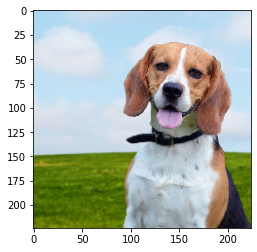

In [294]:
import matplotlib.pyplot as plt
import tensorflow as tf
img =tf.keras.preprocessing.image.load_img('beagle.jpg', target_size=(224,224))
plt.imshow(img)
x= tf.keras.preprocessing.image.img_to_array(img)
x= x.reshape(1, x.shape[0],x.shape[1],x.shape[2])
x= preprocess_input(x)
preds =vggnet.predict(x)
print(decode_predictions(preds))

#Goolgnet, Inception

In [309]:
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

inception =InceptionV3(include_top=True, weights="imagenet", input_tensor=None, input_shape=None, pooling=None, classes=1000)
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_588 (Conv2D)            (None, 149, 149, 32  864         ['input_43[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_584 (Batch  (None, 149, 149, 32  96         ['conv2d_588[0][0]']             
 Normalization)                 )                                                      

In [310]:
!wget -O goldfish.jpg https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg

--2022-12-13 07:15:50--  https://upload.wikimedia.org/wikipedia/commons/7/7a/Goldfish_1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4648040 (4.4M) [image/jpeg]
Saving to: ‘goldfish.jpg’

goldfish.jpg        100%[===================>]   4.43M  17.0MB/s    in 0.3s    

2022-12-13 07:15:50 (17.0 MB/s) - ‘goldfish.jpg’ saved [4648040/4648040]



(299, 299, 3)
1/1 [==============================] - 1s 1s/step
[[('n01443537', 'goldfish', 0.9748752), ('n02701002', 'ambulance', 0.002323414), ('n02606052', 'rock_beauty', 0.0019061652), ('n02607072', 'anemone_fish', 0.00066487706), ('n09256479', 'coral_reef', 0.00043133905)]]


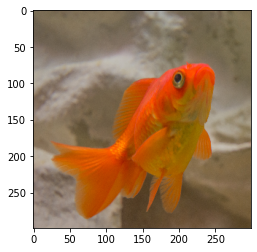

In [311]:
img =tf.keras.preprocessing.image.load_img('goldfish.jpg', target_size=(299, 299))
plt.imshow(img)
x= tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
x= preprocess_input(x)
preds = inception.predict(x)
print(decode_predictions(preds)) # goldfish일 확률이 97퍼 

(224, 224, 3)
1/1 [==============================] - 0s 18ms/step
[[('n03788365', 'mosquito_net', 0.07202596), ('n01498041', 'stingray', 0.029412735), ('n15075141', 'toilet_tissue', 0.022300882), ('n04209239', 'shower_curtain', 0.01827739), ('n01737021', 'water_snake', 0.01652322)]]


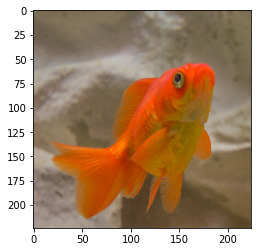

In [226]:
img =tf.keras.preprocessing.image.load_img('fish.jpg', target_size=(224, 224))
                                                        # vggnet.summary()의 입력값
plt.imshow(img)
x= tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
x= preprocess_input(x)
preds = vggnet.predict(x)
print(decode_predictions(preds)) # goldfish일 확률이 97퍼 

In [227]:
vggnet.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# ResNet

In [286]:
from tensorflow.keras.applications.resnet import ResNet50,  preprocess_input, decode_predictions
resnet =ResNet50(include_top=True, weights="imagenet", input_tensor=None, input_shape=None,
                 pooling=None, classes=1000)
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_40 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_40[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [287]:
!wget -O bee.jpg https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg

--2022-12-13 07:04:07--  https://upload.wikimedia.org/wikipedia/commons/4/4d/Apis_mellifera_Western_honey_bee.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2421052 (2.3M) [image/jpeg]
Saving to: ‘bee.jpg’

bee.jpg             100%[===================>]   2.31M  12.1MB/s    in 0.2s    

2022-12-13 07:04:07 (12.1 MB/s) - ‘bee.jpg’ saved [2421052/2421052]



(224, 224, 3)
1/1 [==============================] - 1s 863ms/step
[[('n02206856', 'bee', 0.99909735), ('n03530642', 'honeycomb', 0.0005630681), ('n02190166', 'fly', 0.00014328204), ('n02727426', 'apiary', 0.00010174404), ('n02219486', 'ant', 5.756559e-05)]]


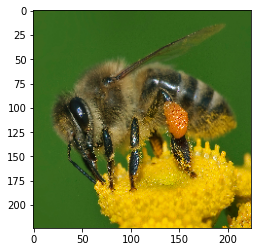

In [288]:
resnet =ResNet50(include_top=True, weights="imagenet", input_tensor=None, input_shape=None,
                 pooling=None, classes=1000)
img =tf.keras.preprocessing.image.load_img('bee.jpg', target_size=(224, 224))
plt.imshow(img)
x= tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
x= preprocess_input(x)
preds = resnet.predict(x)
print(decode_predictions(preds)) # goldfish일 확률이 97퍼 

#### xception
- Inception module을 이용하여 depthwise convolution 적용

<img src = https://blog.kakaocdn.net/dn/6V9q0/btqDljbepra/DF1ThJtDumzPXNgJc3fq5K/img.png>

In [253]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions

xception =Xception(include_top=True, weights="imagenet", input_tensor=None, input_shape=None,
                 pooling=None, classes=1000)
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_37 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_37[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [254]:
!wget -O beaver.jpg https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg

--2022-12-13 06:58:51--  https://upload.wikimedia.org/wikipedia/commons/6/6b/American_Beaver.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186747 (182K) [image/jpeg]
Saving to: ‘beaver.jpg’

beaver.jpg          100%[===================>] 182.37K  --.-KB/s    in 0.08s   

2022-12-13 06:58:51 (2.23 MB/s) - ‘beaver.jpg’ saved [186747/186747]



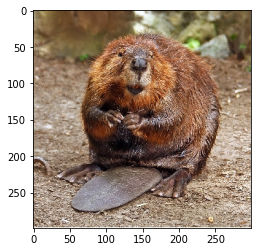

In [255]:
img =tf.keras.preprocessing.image.load_img('beaver.jpg', target_size=(299, 299))
plt.imshow(img)

In [256]:
x= tf.keras.preprocessing.image.img_to_array(img) # 이미지 어레이
print(x.shape)
x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
x= preprocess_input(x) # 미리 전처리
preds = xception.predict(x) # 예측
print(decode_predictions(preds)) # 해독

(299, 299, 3)
1/1 [==============================] - 1s 713ms/step
[[('n02363005', 'beaver', 0.82792246), ('n02361337', 'marmot', 0.05973949), ('n02493509', 'titi', 0.0044218353), ('n02442845', 'mink', 0.002409179), ('n01883070', 'wombat', 0.001986417)]]


## MobileNet

* 성능보다 모델의 크기 또는 연산 속도 감소
* Depthwise conv와 Pointwise conv 사이에도 batch normalization(배치마다 정규화한다.)과 ReLU를 삽입
* Conv layer를 활용한 모델과 정확도는 비슷하면서 계산량은 9배, 파라미터 수는 7배 줄임


In [313]:
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

mobilenet =MobileNet(include_top=True, weights="imagenet", input_tensor=None, input_shape=None,
                                      pooling=None, classes=1000)
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [314]:
!wget -O crane.jpg https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg


--2022-12-13 07:16:46--  https://p1.pxfuel.com/preview/42/50/534/europe-channel-crane-harbour-crane-harbour-cranes-cranes-transport.jpg
Resolving p1.pxfuel.com (p1.pxfuel.com)... 104.21.71.48, 172.67.169.122, 2606:4700:3035::6815:4730, ...
Connecting to p1.pxfuel.com (p1.pxfuel.com)|104.21.71.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86911 (85K) [image/jpeg]
Saving to: ‘crane.jpg’

crane.jpg           100%[===================>]  84.87K  --.-KB/s    in 0.01s   

2022-12-13 07:16:46 (5.64 MB/s) - ‘crane.jpg’ saved [86911/86911]



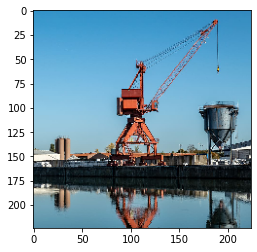

In [315]:
img =tf.keras.preprocessing.image.load_img('crane.jpg', target_size=(224, 224))
plt.imshow(img)

In [316]:
x= tf.keras.preprocessing.image.img_to_array(img) # 이미지 어레이
print(x.shape)
x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
x= preprocess_input(x) # 미리 전처리
preds = mobilenet.predict(x) # 예측
print(decode_predictions(preds)) # 해독

(224, 224, 3)
1/1 [==============================] - 0s 453ms/step
[[('n03126707', 'crane', 0.96001226), ('n03216828', 'dock', 0.029438632), ('n03240683', 'drilling_platform', 0.0051289643), ('n03344393', 'fireboat', 0.0026267334), ('n04366367', 'suspension_bridge', 0.00050067337)]]


## DenseNet

* 각 층은 모든 앞 단계에서 올 수 있는 지름길 연결 구성
* 특징지도의 크기를 줄이기 위해 풀링 연산 적용 필요
* 밀집 블록(dense block)과 전이층(transition layer)으로 구성 
* 전이층 : 1x1 컨볼루션과 평균값 풀링(APool)으로 구성   

<img src="https://oi.readthedocs.io/en/latest/_images/cnn_vs_resnet_vs_densenet.png" width="700">


In [318]:
from keras.applications.densenet import DenseNet201, preprocess_input, decode_predictions

densenet =DenseNet201(include_top=True, weights="imagenet", input_tensor=None, input_shape=None,
                                      pooling=None, classes=1000)
densenet.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_12 (ZeroPadding  (None, 230, 230, 3)  0          ['input_45[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_12[0][0]']      
                                )                                                       

In [319]:
!wget -O zebra.jpg https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg

--2022-12-13 07:17:10--  https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188036 (184K) [image/jpeg]
Saving to: ‘zebra.jpg’

zebra.jpg           100%[===================>] 183.63K  --.-KB/s    in 0.08s   

2022-12-13 07:17:11 (2.19 MB/s) - ‘zebra.jpg’ saved [188036/188036]



1/1 [==============================] - 3s 3s/step
[[('n02391049', 'zebra', 0.9312879), ('n01518878', 'ostrich', 0.019827232), ('n02423022', 'gazelle', 0.011584478), ('n02397096', 'warthog', 0.0046248375), ('n02422106', 'hartebeest', 0.0031534776)]]


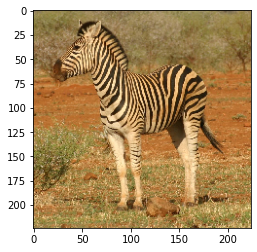

In [320]:
img =tf.keras.preprocessing.image.load_img('zebra.jpg', target_size=(224, 224))
plt.imshow(img)
x= tf.keras.preprocessing.image.img_to_array(img) # 이미지 어레이
x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
x= preprocess_input(x) # 미리 전처리
preds = densenet.predict(x) # 예측
print(decode_predictions(preds)) # 해독

# 과제 6개 이미지에 대해서 6개의 사전학습모델을 이용해서 가장 성능이 좋은 경우 3개와  안좋은 경우 1개

In [43]:
beagle =tf.keras.preprocessing.image.load_img('dog.jpg', target_size=(224,224))
fish =tf.keras.preprocessing.image.load_img('fish.jpg', target_size=(299, 299))
bee =tf.keras.preprocessing.image.load_img('bee.jpg', target_size=(224, 224))
beaver=tf.keras.preprocessing.image.load_img('beaver.jpg', target_size=(299, 299))
crane =tf.keras.preprocessing.image.load_img('crane.jpg', target_size=(224, 224))
zebra =tf.keras.preprocessing.image.load_img('zebra.jpg', target_size=(224,224))

image = [dog, fish, bee, beaver, crane, zebra]
name=['dog',' fish', 'bee', 'beaver', 'crane', 'zebra']
mname=['vggnet', 'inception', 'resnet', 'xception', 'mobilenet', 'densenet']
module= [vggnet, inception, resnet, xception, mobilenet, densenet]

nimage1 = ["dog",  "bee", "crane", "zebra"]
nimage2 = ["fish", "beaver"]


module2= [inception, xception]


image1 = [dog,  bee, crane, zebra]
module1= [vggnet, resnet, mobilenet, densenet]

image2 = [fish, beaver]
module2= [inception, xception]



In [267]:
def model_test(model):
  img_model = ['dog', 'goldfish', 'bee', 'zebra', 'beaver', 'crane']
  all_acc = []
  for image in img_model:    
    img_file = image + '.jpg'
    img = tf.keras.preprocessing.image.load_img(img_file, target_size=model.input_shape[1:3])
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = x.reshape(1, x.shape[0], x.shape[1], x.shape[2])
    x = preprocess_input(x)
    preds = model.predict(x)     
    for i in decode_predictions(preds)[0]:
      if i[1] == image: # model에서 goldfish는 하나만 나온다...?
        all_acc.append(i[2])
        #break
      else:
        pass
    
  return all_acc


In [ ]:
module= [vggnet, inception, resnet, xception, mobilenet, densenet]
img_model = ['beagle', 'goldfish', 'bee', 'zebra', 'beaver', 'crane']
for image in img_model:
  img1= image+'.jpg'
  for j in module:
    target_sizes= j.input_shape[1:3]
    img =tf.keras.preprocessing.image.load_img(img1, target_size=target_sizes)
    x= tf.keras.preprocessing.image.img_to_array(img) # 이미지 어레이
    x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
    x= preprocess_input(x) # 미리 전처리
    preds = j.predict(x) # 예측
    c=decode_predictions(preds)
    if c[0][0][1] ==




In [271]:
def model_test(model):
  li=[]
  img_model = ['beagle', 'goldfish', 'bee', 'zebra', 'beaver', 'crane']
  for image in img_model:
    img1= image+'.jpg'
    target_sizes= model.input_shape[1:3]
    img =tf.keras.preprocessing.image.load_img(img1, target_size=target_sizes)
    x= tf.keras.preprocessing.image.img_to_array(img) # 이미지 어레이
    x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
    x= preprocess_input(x) # 미리 전처리
    preds = model.predict(x) # 예측
    c=decode_predictions(preds)
    for i in c[0]:
     if i[1] == image:
        li.append(i[2])
     else:
        pass
  return(li)    




In [303]:
a= pd.DataFrame(model_test(vggnet))
a

1/1 [==============================] - 0s 20ms/step


,0
0,0.839556
1,0.999947
2,0.998106
3,0.999601
4,0.889285
5,0.630770


In [312]:
b= pd.DataFrame(model_test(inception))
b

1/1 [==============================] - 0s 29ms/step


,0
0,0.502916
1,0.974875
2,0.964906
3,0.969240
4,0.959053
5,0.773496


In [305]:
c= pd.DataFrame(model_test(resnet))
c

1/1 [==============================] - 0s 23ms/step


,0
0,0.975319
1,0.994548
2,0.999097
3,0.961984
4,0.994412
5,0.994080


In [322]:
d= pd.DataFrame(model_test(xception))
d

1/1 [==============================] - 0s 21ms/step


,0
0,0.917328
1,0.942083
2,0.849921
3,0.952728
4,0.881077
5,0.726363


In [323]:
e= pd.DataFrame(model_test(mobilenet))
e

1/1 [==============================] - 0s 19ms/step


,0
0,0.830705
1,0.993815
2,0.999506
3,0.999253
4,0.961874
5,0.992502


In [324]:
f=pd.DataFrame(model_test(densenet))
f

1/1 [==============================] - 0s 43ms/step


,0
0,0.728249
1,0.999816
2,0.977036
3,0.931288
4,0.976864
5,0.988558


In [326]:
img_model = ['dog', 'goldfish', 'bee', 'zebra', 'beaver', 'crane']
mname=['vggnet', 'inception', 'resnet', 'xception', 'mobilenet', 'densenet']


df1 = pd.concat([a,b,c,d,e,f], axis=1)
df1.index =img_model 
df1.columns = mname
df1

,vggnet,inception,resnet,xception,mobilenet,densenet
dog,0.839556,0.502916,0.975319,0.917328,0.830705,0.728249
goldfish,0.999947,0.974875,0.994548,0.942083,0.993815,0.999816
bee,0.998106,0.964906,0.999097,0.849921,0.999506,0.977036
zebra,0.999601,0.969240,0.961984,0.952728,0.999253,0.931288
beaver,0.889285,0.959053,0.994412,0.881077,0.961874,0.976864
crane,0.630770,0.773496,0.994080,0.726363,0.992502,0.988558


In [155]:
module= [vggnet, inception, resnet, xception, mobilenet, densenet]
img_model = ['beagle', 'goldfish', 'bee', 'zebra', 'beaver', 'crane']
mname=['vggnet', 'inception', 'resnet', 'xception', 'mobilenet', 'densenet']
li=[]
for image in img_model:
  img1= image+'.jpg'
  for j in module:
    target_sizes= j.input_shape[1:3]
    img =tf.keras.preprocessing.image.load_img(img1, target_size=target_sizes)
    x= tf.keras.preprocessing.image.img_to_array(img) # 이미지 어레이
    x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
    x= preprocess_input(x) # 미리 전처리
    preds = j.predict(x) # 예측
    c=decode_predictions(preds)
    li.append(decode_predictions(preds)[0][0][2])
    print(image, i )
    print(c)
  print("------") 


df =pd.DataFrame(li)
h=df[:6]
a=df[6:12].reset_index(drop=True)
b=df[12:18].reset_index(drop=True)
c=df[18:24].reset_index(drop=True)
d=df[24:30].reset_index(drop=True)
e=df[30:36].reset_index(drop=True)
df1 = pd.concat([h, a, b, c, d,e], axis=1)
df1=df1.T
df1.index=img_model
df1.columns=mname
df1

1/1 [==============================] - 0s 21ms/step
beagle <keras.engine.functional.Functional object at 0x7f94c247f730>
[[('n02092339', 'Weimaraner', 0.07483189), ('n03788365', 'mosquito_net', 0.07186846), ('n02099849', 'Chesapeake_Bay_retriever', 0.032822084), ('n02088364', 'beagle', 0.025461324), ('n02091032', 'Italian_greyhound', 0.020108141)]]
1/1 [==============================] - 0s 28ms/step
beagle <keras.engine.functional.Functional object at 0x7f94c247f730>
[[('n02088364', 'beagle', 0.7640038), ('n02089973', 'English_foxhound', 0.09488003), ('n02089867', 'Walker_hound', 0.07780893), ('n02088466', 'bloodhound', 0.0036393213), ('n02088238', 'basset', 0.003050123)]]
1/1 [==============================] - 0s 22ms/step
beagle <keras.engine.functional.Functional object at 0x7f94c247f730>
[[('n03291819', 'envelope', 0.050572433), ('n02840245', 'binder', 0.02351683), ('n03729826', 'matchstick', 0.018888962), ('n02783161', 'ballpoint', 0.01782965), ('n03804744', 'nail', 0.016015831)]]

,vggnet,inception,resnet,xception,mobilenet,densenet
beagle,0.074832,0.764004,0.050572,0.917328,0.830705,0.728249
goldfish,0.056708,0.967233,0.173886,0.942083,0.993815,0.999816
bee,0.039348,0.363226,0.047629,0.849921,0.999506,0.977036
zebra,0.037170,0.964041,0.075571,0.952728,0.999253,0.931288
beaver,0.042582,0.919455,0.031926,0.881077,0.961874,0.976864
crane,0.089701,0.760002,0.319944,0.726363,0.992502,0.988558


In [131]:
module= [vggnet, inception, resnet, xception, mobilenet, densenet]
img_model = ['dog', 'goldfish', 'bee', 'zebra', 'beaver', 'crane']

for i in module:
    target_sizes= i.input_shape[1:3]
    for image in img_model:
      img= image+'.jpg'
      img =tf.keras.preprocessing.image.load_img(img, target_size=target_sizes)
      x= tf.keras.preprocessing.image.img_to_array(img) # 이미지 어레이
      x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
      x= preprocess_input(x) # 미리 전처리
      preds = i.predict(x) # 예측
      c=decode_predictions(preds)
      print(image, i )
      print(c)
    print("------")
    # 모델한개당 6개의 이미지이다. 

1/1 [==============================] - 0s 22ms/step
dog <keras.engine.functional.Functional object at 0x7f93e32bfbb0>
[[('n02092339', 'Weimaraner', 0.07483189), ('n03788365', 'mosquito_net', 0.07186846), ('n02099849', 'Chesapeake_Bay_retriever', 0.032822084), ('n02088364', 'beagle', 0.025461324), ('n02091032', 'Italian_greyhound', 0.020108141)]]
1/1 [==============================] - 0s 19ms/step
goldfish <keras.engine.functional.Functional object at 0x7f93e32bfbb0>
[[('n01498041', 'stingray', 0.0567079), ('n03788365', 'mosquito_net', 0.05371403), ('n01632777', 'axolotl', 0.03270385), ('n01819313', 'sulphur-crested_cockatoo', 0.028736835), ('n01737021', 'water_snake', 0.023060042)]]
1/1 [==============================] - 0s 20ms/step
bee <keras.engine.functional.Functional object at 0x7f93e32bfbb0>
[[('n03788365', 'mosquito_net', 0.039347533), ('n01737021', 'water_snake', 0.030976826), ('n02233338', 'cockroach', 0.021862911), ('n04209239', 'shower_curtain', 0.021716276), ('n01498041', 

In [119]:
module= [vggnet, inception, resnet, xception, mobilenet, densenet]
img_model = ['dog', 'goldfish', 'bee', 'zebra', 'beaver', 'crane']

for i in module:
    target_sizes= i.input_shape[1:3]
    for image in img_model:
      img= image+'.jpg'
      img =tf.keras.preprocessing.image.load_img(img, target_size=target_sizes)
      x= tf.keras.preprocessing.image.img_to_array(img) # 이미지 어레이
      x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
      x= preprocess_input(x) # 미리 전처리
      preds = i.predict(x) # 예측
      c=decode_predictions(preds)
      print(c)
    print("------")
    # 모델한개당 6개의 이미지이다. 

1/1 [==============================] - 0s 24ms/step
[[('n02092339', 'Weimaraner', 0.07483189), ('n03788365', 'mosquito_net', 0.07186846), ('n02099849', 'Chesapeake_Bay_retriever', 0.032822084), ('n02088364', 'beagle', 0.025461324), ('n02091032', 'Italian_greyhound', 0.020108141)]]
1/1 [==============================] - 0s 22ms/step
[[('n01498041', 'stingray', 0.0567079), ('n03788365', 'mosquito_net', 0.05371403), ('n01632777', 'axolotl', 0.03270385), ('n01819313', 'sulphur-crested_cockatoo', 0.028736835), ('n01737021', 'water_snake', 0.023060042)]]
1/1 [==============================] - 0s 20ms/step
[[('n03788365', 'mosquito_net', 0.039347533), ('n01737021', 'water_snake', 0.030976826), ('n02233338', 'cockroach', 0.021862911), ('n04209239', 'shower_curtain', 0.021716276), ('n01498041', 'stingray', 0.018317167)]]
1/1 [==============================] - 0s 21ms/step
[[('n02018795', 'bustard', 0.037169565), ('n03788365', 'mosquito_net', 0.022973998), ('n01737021', 'water_snake', 0.02127725

In [117]:
module= [vggnet, inception, resnet, xception, mobilenet, densenet]
li2=[]
for i in module:
    target_sizes= i.input_shape[1:3]
    beagle =tf.keras.preprocessing.image.load_img('beagle.jpg', target_size=target_sizes)
    goldfish =tf.keras.preprocessing.image.load_img('goldfish.jpg', target_size=target_sizes)
    bee =tf.keras.preprocessing.image.load_img('bee.jpg', target_size=target_sizes)
    beaver=tf.keras.preprocessing.image.load_img('beaver.jpg', target_size=target_sizes)
    crane =tf.keras.preprocessing.image.load_img('crane.jpg', target_size=target_sizes)
    zebra =tf.keras.preprocessing.image.load_img('zebra.jpg', target_size=target_sizes)
    for j in images:
      x= tf.keras.preprocessing.image.img_to_array(j) # 이미지 어레이
      x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
      x= preprocess_input(x) # 미리 전처리
      preds = i.predict(x) # 예측
      c=decode_predictions(preds)
      print(c) 
    print("-------")

1/1 [==============================] - 0s 20ms/step
[[('n02092339', 'Weimaraner', 0.07483189), ('n03788365', 'mosquito_net', 0.07186846), ('n02099849', 'Chesapeake_Bay_retriever', 0.032822084), ('n02088364', 'beagle', 0.025461324), ('n02091032', 'Italian_greyhound', 0.020108141)]]
1/1 [==============================] - 0s 18ms/step
[[('n01498041', 'stingray', 0.0567079), ('n03788365', 'mosquito_net', 0.05371403), ('n01632777', 'axolotl', 0.03270385), ('n01819313', 'sulphur-crested_cockatoo', 0.028736835), ('n01737021', 'water_snake', 0.023060042)]]
1/1 [==============================] - 0s 17ms/step
[[('n01498041', 'stingray', 0.0567079), ('n03788365', 'mosquito_net', 0.05371403), ('n01632777', 'axolotl', 0.03270385), ('n01819313', 'sulphur-crested_cockatoo', 0.028736835), ('n01737021', 'water_snake', 0.023060042)]]
1/1 [==============================] - 0s 18ms/step
[[('n03788365', 'mosquito_net', 0.039347533), ('n01737021', 'water_snake', 0.030976826), ('n02233338', 'cockroach', 0.02

In [30]:
import pandas as pd
dog =tf.keras.preprocessing.image.load_img('dog.jpg', target_size=(224,224))
fish =tf.keras.preprocessing.image.load_img('fish.jpg', target_size=(244, 244))
bee =tf.keras.preprocessing.image.load_img('bee.jpg', target_size=(224, 224))
beaver=tf.keras.preprocessing.image.load_img('beaver.jpg', target_size=(244, 244))
crane =tf.keras.preprocessing.image.load_img('crane.jpg', target_size=(224, 224))
zebra =tf.keras.preprocessing.image.load_img('zebra.jpg', target_size=(224,224))

image = [dog, fish, bee, beaver, crane, zebra]
name=['dog',' fish', 'bee', 'beaver', 'crane', 'zebra']
mname=['vggnet', 'inception', 'resnet', 'xception', 'mobilenet', 'densenet']
module= [vggnet, inception, resnet, xception, mobilenet, densenet]

li=[]
for i in range(len(image)):
  for j in range(len(module)):
      x= tf.keras.preprocessing.image.img_to_array(image[i]) # 이미지 어레이
      x= x.reshape(1,x.shape[0],x.shape[1],x.shape[2]) # 틀수정
      x= preprocess_input(x) # 미리 전처리
      preds = module[j].predict(x) # 예측
      print(name[i], mname[j])
      c=decode_predictions(preds)[0][0][2]
      print(c) # 해독
      li.append(c)
  print("-----------")

df1 =pd.DataFrame(li)
df1[0:6]
a=df1[6:12].reset_index(drop=True)
b=df1[12:18].reset_index(drop=True)
c=df1[18:24].reset_index(drop=True)
d=df1[24:30].reset_index(drop=True)
e=df1[30:36].reset_index(drop=True)
df2 = pd.concat([df1[0:6], a, b, c, d,e], axis=1)
df2.index=name
df2.columns=mname
df2

1/1 [==============================] - 0s 22ms/step
dog vggnet
0.07483189
1/1 [==============================] - 0s 29ms/step
dog inception
0.99593204
1/1 [==============================] - 0s 24ms/step
dog resnet
0.050572433
1/1 [==============================] - 0s 22ms/step
dog xception
0.9962607
1/1 [==============================] - 0s 21ms/step
dog mobilenet
0.83070487
1/1 [==============================] - 0s 46ms/step
dog densenet
0.7282489
-----------
1/1 [==============================] - 0s 21ms/step
 fish vggnet
0.061418056
1/1 [==============================] - 0s 30ms/step
 fish inception
0.9999361
1/1 [==============================] - 0s 24ms/step
 fish resnet
0.21493173
1/1 [==============================] - 0s 22ms/step
 fish xception
0.9974866
1/1 [==============================] - 0s 34ms/step
 fish mobilenet
0.99970824
1/1 [==============================] - 0s 47ms/step
 fish densenet
0.9997042
-----------
1/1 [==============================] - 0s 20ms/step
bee vgg

,vggnet,inception,resnet,xception,mobilenet,densenet
dog,0.074832,0.061418,0.039348,0.048662,0.089701,0.037170
fish,0.995932,0.999936,0.999959,0.994995,0.927026,0.999999
bee,0.050572,0.214932,0.047629,0.157905,0.319944,0.075571
beaver,0.996261,0.997487,0.998454,0.939073,0.810026,0.999963
crane,0.830705,0.999708,0.999506,0.995450,0.992502,0.999253
zebra,0.728249,0.999704,0.977036,0.967461,0.988558,0.931288


In [ ]:
import os
import time


file_list = os.listdir('./')

file_list_jpg = [f for f in file_list if f.endswith(".jpg")]

prediction_result = pd.DataFrame()

#mobilenet
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions
mobilenet = MobileNet(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (224,224))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = mobilenet.predict(x)
  prediction_result.loc['MobileNet',i] = decode_predictions(preds)[0][0][2]  # 1번 분류가 맞다는 가정하에 확률 출력(분류는 잘 되었기 때문에 확률만 출력)
  print(decode_predictions(preds))

prediction_result.loc['MobileNet',6] = time.time() - start

#densenet
from keras.applications.densenet import DenseNet201, preprocess_input, decode_predictions
densenet = DenseNet201(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (224,224))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = densenet.predict(x)
  prediction_result.loc['DenseNet',i] = decode_predictions(preds)[0][0][2]
  print(decode_predictions(preds))

prediction_result.loc['DenseNet',6] = time.time() - start

#Xception
from keras.applications.xception import Xception, preprocess_input, decode_predictions
xception = Xception(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (299,299))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = xception.predict(x)
  prediction_result.loc['Xception',i] = decode_predictions(preds)[0][0][2]
  print(decode_predictions(preds))

prediction_result.loc['Xception',6] = time.time() - start

#ResNet
from keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
resnet = ResNet50(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (224,224))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = resnet.predict(x)
  prediction_result.loc['ResNet',i] = decode_predictions(preds)[0][0][2]
  print(decode_predictions(preds))

prediction_result.loc['ResNet',6] = time.time() - start  

#inception
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
inception = InceptionV3(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (299,299))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = inception.predict(x)
  prediction_result.loc['Inception',i] = decode_predictions(preds)[0][0][2] 
  print(decode_predictions(preds))

prediction_result.loc['Inception',6] = time.time() - start    

# VGG19
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
vggnet = VGG19(weights="imagenet", include_top=True)

start = time.time()  # 시작 시간 저장

for i , f in enumerate(file_list_jpg):
  img = tf.keras.preprocessing.image.load_img(f, target_size = (224,224))
  x = tf.keras.preprocessing.image.img_to_array(img)
  x = x.reshape(1,x.shape[0], x.shape[1], x.shape[2])
  x = preprocess_input(x)
  preds = vggnet.predict(x)
  prediction_result.loc['VGG19',i] = decode_predictions(preds)[0][0][2]
  print(decode_predictions(preds))

prediction_result.loc['VGG19',6] = time.time() - start      


# 이미지 출력
plt.figure(figsize=(15, 10))
for i, f in enumerate(file_list_jpg) :
  img_name = './'  + f
  ax = plt.subplot(2, 3, i + 1)
  img = tf.keras.preprocessing.image.load_img(img_name, target_size = (224,224))
  plt.imshow(img)
  plt.axis("off")


#column rename
prediction_result.rename(columns={0:'zebra', 1:'goldfish', 2:'bee', 3:'crane', 4:'beaver', 5:'beagle', 6:'걸린시간'}, inplace = True)

prediction_result